**OBJECTIVE:** Download the data used in this workshop

**AUTHOR:** [@jonjoncardoso](https://github.com/jonjoncardoso)

**LAST UPDATED:** 23/02/2022

---
<div class="csl-entry">Andrade Junior, J. E., Cardoso-Silva, J., &#38; Bezerra, L. C. T. (2021). Comparing Contextual Embeddings for Semantic Textual Similarity in Portuguese. <i>Lecture Notes in Computer Science (Including Subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)</i>, <i>13074 LNAI</i>, 389–404. </div>

----

Link to download [here](https://www.researchgate.net/publication/356582885_Comparing_Contextual_Embeddings_for_Semantic_Textual_Similarity_in_Portuguese)

# Imports

In [1]:
import os

import numpy as np
import pandas as pd
import xml.etree.ElementTree as et 

from plotnine import *

# Dataset Description

The data we are using was annotated in two workshops: [ASSIN](http://propor2016.di.fc.ul.pt/?page_id=381) & [ASSIN2 workshop](https://sites.google.com/view/assin2/).

The following description comes from the ASSIN website:

> **Task Description**
>
> The ASSIN dataset contains 10,000 sentence pairs collected from Google News, half from Brazilian sources and half from Portuguese ones. 6,000 pairs are released for training and the remaining will serve as a blind test set. Each pair is annotated for both semantic relatedness and textual entailment.
>
> Semantic relatedness is measured on a scale from 1 to 5. The general guidelines for each score are:
>
>    1. Completely different sentences, on different subjects
>    1. Sentences are not related, but are roughly on the same subject
>    1. Sentences are somewhat related; they may describe different facts but share some details
>    1. Sentences are strongly related, but some details differ
>    1. Sentences mean essentially the same thing
>
> A sentence _T_ (the text) entails another sentence _H_ (the hypothesis) if, after reading both and knowing that _T_ is true, a person concludes that _H_ must also be true. ASSIN also distinguishes bidirectional entailment cases, or paraphrases.
>
>

# Data Input

The data was stored in XML format. Let us parse it as a dataframe:

In [2]:
def parse_xml(xml_file):
    
    dataset = str(os.path.basename(xml_file).replace(".xml", ""))
    
    """Parse xml to pandas dataframe."""
    xtree = et.parse(xml_file)
    xroot = xtree.getroot() 

    df_cols = ['id', 't', 'h', 'similarity', 'language', 'set']
    rows = []

    for node in xroot:
        id_ = node.attrib.get("id")
        similarity = node.attrib.get("similarity")
        t = node.find("t").text
        h = node.find("h").text

        rows.append({
            "id": int(id_),
            "t": str(t), 
            "h": str(h),
            "similarity": float(similarity),
            "language": dataset[6:10],
            "set": dataset[11:]
        })
    return pd.DataFrame(rows, columns=df_cols)

In [3]:
DATA_DIRECTORY = "../data/assin_data/"
dataset_names = ['assin-ptbr-train.xml', 
                 'assin-ptbr-dev.xml', 
                 'assin-ptbr-test.xml', 
                 'assin-ptpt-train.xml', 
                 'assin-ptpt-dev.xml', 
                 'assin-ptpt-test.xml']

df = pd.concat([parse_xml(os.path.join(DATA_DIRECTORY, dataset_name)) 
                for dataset_name in dataset_names])

In [4]:
df.shape

(10000, 6)

In [5]:
df.groupby(["set", "language"]).apply(lambda x: pd.Series({"count": len(x)}))

count
set   language       
dev   ptbr        500
      ptpt        500
test  ptbr       2000
      ptpt       2000
train ptbr       2500
      ptpt       2500

# Sentence Similarity scores

/home/jonathan/Workspace/bracis-2021-supp-material/env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


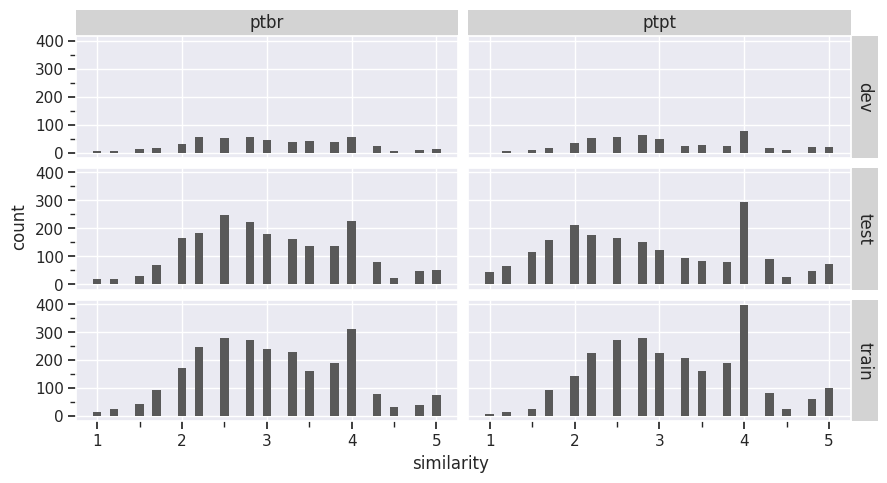

<ggplot: (8769789382129)>

In [6]:
g = (ggplot(df, aes(x='similarity')) +
     geom_histogram(binwidth=0.1) + 
     theme_seaborn() + 
     theme(figure_size=(10, 5)) +
     facet_grid("set ~ language"))

g

# Examples of Sentences


## Similarity = 5 | 🇧🇷 PT-BR

In [7]:
df[(df["language"] == "ptbr") & (df["similarity"] == 5)].set_index(["t", "h", "similarity"])[[]].sample(n=4)

,,
t,h,similarity
Vou convocar um congresso extraordinário para me substituir enquanto presidente.,Vou organizar um congresso extraordinário para se realizar a minha substituição como presidente.,5.0
Conseguimos reverter os momentos de abatimento que vinham acontecendo após os gols sofridos.,"O time vinha se abatendo quando tomava um gol, e conseguimos reverter isso.",5.0
Cerca de 5 mil pessoas trabalham usando a plataforma Uber hoje no Brasil.,"Atualmente, cerca de 5 mil profissionais atuam usando a plataforma Uber no país.",5.0
"Oito, dos onze ministros, entenderam que as doações empresariais ferem a Constituição e desequilibram a disputa eleitoral.","Por oito votos a três, o Supremo entendeu que as doações empresariais ferem a Constituição e desequilibram a disputa eleitoral.",5.0


## Similarity = 5 | 🇵🇹 PT-PT

In [8]:
df[(df["language"] == "ptpt") & (df["similarity"] == 5)].set_index(["t", "h", "similarity"])[[]].sample(n=4)

,,
t,h,similarity
A Universidade de Yale contou com a colaboração da neozelandeza até à sua morte.,A neozelandeza trabalhou na Universidade de Yale até ao final da sua vida.,5.0
"Por oposição, Chipre e a Grécia falharam na melhoria destes pilares.","Por outro lado, Chipre e a Grécia não conseguiram melhorar nestes pilares.",5.0
"Entretanto, dados gravitacionais coletados durante voos rasantes da sonda suportam a possibilidade de o mar ser global.","No entanto, dados gravitacionais coletados durante voos rasantes da sonda reforçam a chance de o mar ser global.",5.0
Essa é uma matéria que precisa de estudo e portanto só será posta em prática para 2017.,Essa é outra matéria que exige estudo e portanto nunca será aplicada antes de 2017.,5.0



## Similarity = 4 | 🇧🇷 PT-BR

In [9]:
df[(df["language"] == "ptbr") & (df["similarity"] == 4)].set_index(["t", "h", "similarity"])[[]].sample(n=4)

,,
t,h,similarity
Quando o Dragão trocava bola e esperava o final da partida veio o castigo aos 41 minutos.,O castigo do Dragão veio aos 41 minutos.,4.0
"O zagueiro do Real Madrid, Pepe, renovou contrato com o clube merengue, até 2017.","Pepe renovou o contrato com o Real Madrid esta sexta-feira, dia 21.",4.0
"De quebra, o atacante sueco de 34 anos também se tornou o maior artilheiro do Paris Saint-Germain.","Agora, o sueco é o maior artilheiro da história do Paris Saint-Germain.",4.0
Os primeiros a experimentar os vídeos de perfil são donos de iPhones do Reino Unido e do estado da Califórnia (EUA).,"Similar às chamadas Live Photos dos novos iPhones, os vídeos de perfil chegam primeiro aos usuários dos EUA e Reino Unido.",4.0


## Similarity = 4 | 🇵🇹 PT-PT

In [10]:
df[(df["language"] == "ptpt") & (df["similarity"] == 4)].set_index(["t", "h", "similarity"])[[]].sample(n=4)

,,
t,h,similarity
"Na história do Nobel da Literatura, apenas um autor português foi premiado, quando, em 1998, José Saramago recebeu o galardão.",José Saramago é até agora o único autor português que recebeu este prémio Nobel da Literatura.,4.0
"O FC Porto venceu o Benfica (30-25), esta quarta-feira, em jogo da sétima jornada do Nacional de andebol.","O FC Porto venceu, nesta quarta-feira, o Benfica (30-25) no encontro realizado no Dragão Caixa.",4.0
O presidente do Rio Ave confirmou a transferência de Marvin Zeegelaar para o Sporting já em janeiro.,Marvin Zeegelaar será jogador do Sporting a partir de janeiro.,4.0
"A loja de aplicações da Apple foi atacada por hackers pela primeira vez, confirmado pela empresa.",O ataque à loja de aplicações foi confirmado pela própria Apple.,4.0



## Similarity = 1 | 🇧🇷 PT-BR

In [11]:
df[(df["language"] == "ptbr") & (df["similarity"] == 1)].set_index(["t", "h", "similarity"])[[]].sample(n=4)

,,
t,h,similarity
Fica uma sensação de amargura pela partida.,Estava a metros e ficou claro que ele solou.,1.0
"Eu falo aqui no programa, e estou à disposição.",Gilmar Rinaldi desafiou o senador Romário.,1.0
O prazo terminará dia 28 de julho.,"Foi antes da meia-noite, às 23h40m.",1.0
"Então, quem sabe o que o futuro nos reserva.",Então sou amigo dela antes dela ser drag.,1.0


## Similarity = 1 | 🇵🇹 PT-PT

In [12]:
df[(df["language"] == "ptpt") & (df["similarity"] == 1)].set_index(["t", "h", "similarity"])[[]].sample(n=4)

,,
t,h,similarity
Fontes do Governo não esperavam avanços nesta cimeira.,Esse prazo é irreal e as conversações deverão prolongar-se até Abril.,1.0
"Naquele ano, a expectativa de vida delas era de 76,8 anos, contra 70,2 deles.","No ano anterior, o número estava em 19,4% e 10 anos antes, em 14,7%.",1.0
A Altice Labs tem também em curso várias candidaturas a fundos comunitários.,Hoje é o primeiro dia da vida da Altice Labs.,1.0
Sampaio da Nóvoa passará o resto do dia no Porto.,Sampaio da Nóvoa desta vez não se perdeu em palavras retóricas.,1.0


In [13]:
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

model = AutoModelForPreTraining.from_pretrained('neuralmind/bert-base-portuguese-cased')
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)

Some weights of BertForPreTraining were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained(os.path.join(MODEL_DIRECTORY, MODEL_NAME), do_lower_case=False)
bert_model = BertModel.from_pretrained(os.path.join(MODEL_DIRECTORY, MODEL_NAME))

bert_transformer = BertTransformer(tokenizer, bert_model)

NameError: name 'MODEL_DIRECTORY' is not defined

In [ ]:
# Prepare sentences for BERT

sentences = ["[CLS] " + query + " [SEP]" for query in tqdm.tqdm(df["t"])]

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

In [ ]:
tokenized_text = tokenizer.encode_plus(df["t"].head().tolist(), add_special_tokens=True)

torch.tensor(tokenized_text["input_ids"])

In [ ]:
tokenized_texts

In [ ]:
df["t"].iloc[2]

In [ ]:
tokenized_texts[2]

In [ ]:
bert_transformer.tokenizer.tokenize(df['t'].head(5).tolist())

In [ ]:
from transformers import pipeline

pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)

pipe('Tinha uma [MASK] no meio do caminho.')

In [ ]:
bert_transformer = BertTransformer(tokenizer, model)
t_embeddings = bert_transformer.transform(df['t'].tolist())
h_embeddings = bert_transformer.transform(df['h'].tolist())

In [ ]:
t_embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(MODEL_NAME, device="cpu")

t_embeddings = model.encode(df['t'].tolist(), show_progress_bar=True)

In [ ]:
t_embeddings[0,:]